<p style="text-align: right"> 12-12-2023 </p>

<center><img src= "imagen.jpg" ></center>

<h1 style= "text-align: center; color:#566965"> Universidad Castro Carazo  </h1>
<h2 style= "text-align: center; color:#566965"> Dennis Blanco Herrera </h2>
<h4 style= "text-align: center; color: #948a71"> 3C-2023 Analisis de Datos</h4
</br>
<h4 style="text-align: center"> Proyecto Final: Venta de Bienes Raíces </h4>

<p style="font-weight: bold; text-align: left; color:#cc9476 "> Información General:</p>

<p style="text-align: justify"> Durante los años 2021 y 2022 la empresa PK2, ha estado analizando incursionar en la venta de Bienes Rices en los Estados Unidos, siendo que previo a tomar una decisión respecto a dar inicio con las operaciones de venta de propiedades se procedió a recopilar información relacionada con el sector de bienes raíces de USA.
Como resultado de la recopilación de los datos, PK2 identificó y consolido un set de datos con 200.000 observaciones, cada una de ellas conformadas por 14 variables, es decir se generó un Data Set de 2.800.000 datos, razón por la cual se decidido contratar sus servicios para generar el proceso de análisis en pro de disponer de insumos para el proceso de toma de decisiones.
    
Particularmente la alta gerencia de PK2 desea disponer de información que le permita atender las siguientes interrogantes:</p>

<ol>
    <li>Cuál es el ingreso anual de las propiedades vendidas?  </li>
    <li>Qué tipo de propiedad tiene mayor facilidad de venta?</li>
    <li>En cuál ciudad o pueblo se dan mayor cantidad de ventas de propiedades? Y ¿Qué elementos particulares tienen esas ciudades o pueblos? </li>
    <li>¿Cuál es el costo promedio de las propiedades residenciales y comerciales? </li>
    <li>¿Cuál es tipo de propiedades residenciales que se vende con mayor frecuencia, donde y con que costo promedio? </li>
    <li>¿Cuál es margen promedio de ganancia por cada una de las propiedades vendidas? </li>
</ol>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
cols=["Serial Number", "List Year", "Date Recorded", "Town", "Address", "Assessed Value", 
       "Sale Amount", "Sales Ratio", "Property Type", "Residential Type", "Non Use Code", "Assessor Remarks", "OPM remarks"]
dfProyecto= pd.read_excel("DataSet.xlsx") # Despues de la reunion con el encargado de la data, se decidio eliminar las siguientes variables, Non Use Code,Assessor Remarks,OPM remarks,Location 


In [3]:
dfProyecto.head(6) #Primeros 6 registros

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000,0.463,Commercial,NaN,NaN,NaN,NaN
1,20002,2020,2020-02-10 00:00:00,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,NaN,NaN,NaN
2,200212,2020,2021-09-03 00:00:00,Avon,5 CHESTNUT DRIVE,130400,179900,0.7248,Residential,Condo,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000,0.6958,Residential,Single Family,NaN,NaN,NaN
4,200377,2020,2021-02-07 00:00:00,Avon,70 FAR HILLS DRIVE,862330,1447500,0.5957,Residential,Single Family,NaN,NaN,NaN
5,200109,2020,2020-09-12 00:00:00,Avon,57 FAR HILLS DRIVE,847520,1250000,0.678,Residential,Single Family,NaN,NaN,NaN


In [4]:
dfProyecto.tail(6) #ultimos 6 registros

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks
200329,39267,2003,2004-03-09 00:00:00,Clinton,133 W MAIN ST C8,8100,3000,2.7,NaN,NaN,25,NaN,NaN
200330,20763,2002,06/17/2003,West Haven,130 JONES ST,70700,179000,0.394972,NaN,NaN,NaN,NaN,NaN
200331,21066,2002,07/22/2003,West Hartford,15 PORTER DR,240880,515000,0.467728,NaN,NaN,NaN,NaN,NaN
200332,30531,2003,04/15/2004,East Hartford,43 TIFFANY RD,80330,130000,0.617923,NaN,NaN,14,NaN,NaN
200333,30624,2003,2004-03-03 00:00:00,Bristol,81 ANDREWS ST,69230,130000,0.532538,NaN,NaN,NaN,NaN,NaN
200334,30434,2003,2004-06-02 00:00:00,Greenwich,57 PROSPECT ST,183470,375000,0.489253,NaN,NaN,NaN,NaN,NaN


In [5]:
dfProyecto.shape #tamaño del Dataframe

(200335, 13)

In [6]:
dfProyecto.describe() #me considera todas las variables (columnas) que sean de campo numérico y cuando se cargaron a Python se identificaron como campo numérico

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks
count,200334,199287,199273,199284,199256,199264,199261,199261,65893,60265,45092,13525,1770
unique,20264,44,2522,182,177212,41675,15537,114095,10,6,65,7571,926
top,20004,2020,2002-01-07 00:00:00,Stamford,MULTI ADDRESSES,0,150000,0,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS
freq,156,65518,779,7857,475,1556,1984,2280,59886,42809,9308,462,230


In [7]:
dfProyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200335 entries, 0 to 200334
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Serial Number     200334 non-null  object
 1   List Year         199287 non-null  object
 2   Date Recorded     199273 non-null  object
 3   Town              199284 non-null  object
 4   Address           199256 non-null  object
 5   Assessed Value    199264 non-null  object
 6   Sale Amount       199261 non-null  object
 7   Sales Ratio       199261 non-null  object
 8   Property Type     65893 non-null   object
 9   Residential Type  60265 non-null   object
 10  Non Use Code      45092 non-null   object
 11  Assessor Remarks  13525 non-null   object
 12  OPM remarks       1770 non-null    object
dtypes: object(13)
memory usage: 19.9+ MB


In [8]:
dfProyecto.columns #nombres de columnas

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks'],
      dtype='object')

In [9]:
dfProyecto.rename({'Serial Number':'SerialNumber','List Year':'ListYear' , 'Date Recorded':'DateRecorded','Assessed Value':'AssessedValue', 'Sale Amount':'SaleAmounte','Sales Ratio':'SalesRatio', 'Property Type':'PropertyType','Residential Type':'ResidentialType', 'Non Use Code':'NonUseCode', 'Assessor Remarks':'AssessorRemarks', 'OPM remarks':'OPMremarks' }, axis=1, inplace=True)
#renombrar columnas

In [10]:
dfProyecto.columns #nombres de columnas renombradas

Index(['SerialNumber', 'ListYear', 'DateRecorded', 'Town', 'Address',
       'AssessedValue', 'SaleAmounte', 'SalesRatio', 'PropertyType',
       'ResidentialType', 'NonUseCode', 'AssessorRemarks', 'OPMremarks'],
      dtype='object')

In [11]:
dfTemp=dfProyecto.isnull() # me convierte todo lo Nan en true y lo que tiene datos con false, lo hacemos para contar los datos
dfTemp.head(6)

,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmounte,SalesRatio,PropertyType,ResidentialType,NonUseCode,AssessorRemarks,OPMremarks
0,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,True,True,True
5,False,False,False,False,False,False,False,False,False,False,True,True,True


In [12]:
for columnas in dfTemp.columns.values.tolist(): #recorro columna por columna para ir contando la cantidad de veces q aparece true y false
    #print(columnas)
    print(dfTemp[columnas].value_counts()) # me imprime la cantidad de true y false que exiten en cada variable
    print("")
    # todo lo true son valores faltantes.
    # todo lo false son valores existentes.

SerialNumber
False    200334
True          1
Name: count, dtype: int64

ListYear
False    199287
True       1048
Name: count, dtype: int64

DateRecorded
False    199273
True       1062
Name: count, dtype: int64

Town
False    199284
True       1051
Name: count, dtype: int64

Address
False    199256
True       1079
Name: count, dtype: int64

AssessedValue
False    199264
True       1071
Name: count, dtype: int64

SaleAmounte
False    199261
True       1074
Name: count, dtype: int64

SalesRatio
False    199261
True       1074
Name: count, dtype: int64

PropertyType
True     134442
False     65893
Name: count, dtype: int64

ResidentialType
True     140070
False     60265
Name: count, dtype: int64

NonUseCode
True     155243
False     45092
Name: count, dtype: int64

AssessorRemarks
True     186810
False     13525
Name: count, dtype: int64

OPMremarks
True     198565
False      1770
Name: count, dtype: int64



<p style="font-weight: bold; text-align: left; color:#cc9476 "> Preguntas al experto de la data, reunion:</p>

<ol>
    <li>como desea que se trabajen los valores faltantes? R/ Por sesgo</li>
    <li>Como no tenemos Megadata, las siguientes variables se deben cambian a numero (int/float)?/ R:</li>
    <li> Assessed Value </li>
    <li> Sale Amount </li>
    <li> Sales Ratio esta dado en km, millas, etc</li>
    <li> Puedo limpiar (eliminar)las siguientes variables: Non Use Code, Assessor Remarks, OPM remarks (comentarios).Localition  </li>
</ol>



In [13]:
cols=["Serial Number", "List Year", "Date Recorded", "Town", "Address", "Assessed Value", 
       "Sale Amount", "Sales Ratio", "Property Type", "Residential Type"]
dfProyecto= pd.read_excel("DataSetlim.xlsx") # Despues de la reunion con el encargado de la data, se decidio eliminar las siguientes variables, Non Use Code,Assessor Remarks,OPM remarks,Location 


In [14]:
dfProyecto.head(6)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN
1,20002,2020,2020-02-10 00:00:00,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family
2,200212,2020,2021-09-03 00:00:00,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family
4,200377,2020,2021-02-07 00:00:00,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family
5,200109,2020,2020-09-12 00:00:00,Avon,57 FAR HILLS DRIVE,847520,1250000.0,0.6780,Residential,Single Family


In [15]:
dfProyecto.tail(6)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
200328,39267,2003,2004-03-09 00:00:00,Clinton,133 W MAIN ST C8,8100,3000.0,2.700000,NaN,NaN
200329,20763,2002,06/17/2003,West Haven,130 JONES ST,70700,179000.0,0.394972,NaN,NaN
200330,21066,2002,07/22/2003,West Hartford,15 PORTER DR,240880,515000.0,0.467728,NaN,NaN
200331,30531,2003,04/15/2004,East Hartford,43 TIFFANY RD,80330,130000.0,0.617923,NaN,NaN
200332,30624,2003,2004-03-03 00:00:00,Bristol,81 ANDREWS ST,69230,130000.0,0.532538,NaN,NaN
200333,30434,2003,2004-06-02 00:00:00,Greenwich,57 PROSPECT ST,183470,375000.0,0.489253,NaN,NaN


In [16]:
dfProyecto.shape

(200334, 10)

In [17]:
dfProyecto.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,2.003340e+05,200334.000000,2.003340e+05,2.003340e+05,200334.000000
mean,1.114479e+06,2007.829350,2.206852e+05,3.917497e+05,2.612552
std,1.272892e+07,8.656788,1.166793e+06,1.128766e+07,395.427973
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.097300e+04,2001.000000,6.918000e+04,1.300000e+05,0.443500
50%,2.040300e+04,2002.000000,1.099000e+05,2.150000e+05,0.524698
75%,2.000610e+05,2020.000000,1.874600e+05,3.550000e+05,0.623199
max,2.000500e+09,2020.000000,1.149242e+08,5.000000e+09,165060.000000


In [18]:
dfProyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200334 entries, 0 to 200333
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     200334 non-null  int64  
 1   List Year         200334 non-null  int64  
 2   Date Recorded     200332 non-null  object 
 3   Town              200334 non-null  object 
 4   Address           200327 non-null  object 
 5   Assessed Value    200334 non-null  int64  
 6   Sale Amount       200334 non-null  float64
 7   Sales Ratio       200334 non-null  float64
 8   Property Type     66967 non-null   object 
 9   Residential Type  61104 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 15.3+ MB


In [19]:
dfProyecto.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type'],
      dtype='object')

In [20]:
dfProyecto.rename({'Serial Number':'SerialNumber','List Year':'ListYear' , 'Date Recorded':'DateRecorded','Assessed Value':'AssessedValue', 'Sale Amount':'SaleAmounte','Sales Ratio':'SalesRatio', 'Property Type':'PropertyType','Residential Type':'ResidentialType'}, axis=1, inplace=True)
#renombrar columnas

In [21]:
dfProyecto.columns

Index(['SerialNumber', 'ListYear', 'DateRecorded', 'Town', 'Address',
       'AssessedValue', 'SaleAmounte', 'SalesRatio', 'PropertyType',
       'ResidentialType'],
      dtype='object')

In [22]:
dfTemp=dfProyecto.isnull() # me convierte todo lo Nan en true y lo que tiene datos con false, lo hacemos para contar los datos
dfTemp.head(6)

,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmounte,SalesRatio,PropertyType,ResidentialType
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False


In [23]:
for columnas in dfTemp.columns.values.tolist(): #recorro columna por columna para ir contando la cantidad de veces q aparece true y false
    #print(columnas)
    print(dfTemp[columnas].value_counts()) # me imprime la cantidad de true y false que exiten en cada variable
    print("")
    # todo lo true son valores faltantes.
    # todo lo false son valores existentes.

SerialNumber
False    200334
Name: count, dtype: int64

ListYear
False    200334
Name: count, dtype: int64

DateRecorded
False    200332
True          2
Name: count, dtype: int64

Town
False    200334
Name: count, dtype: int64

Address
False    200327
True          7
Name: count, dtype: int64

AssessedValue
False    200334
Name: count, dtype: int64

SaleAmounte
False    200334
Name: count, dtype: int64

SalesRatio
False    200334
Name: count, dtype: int64

PropertyType
True     133367
False     66967
Name: count, dtype: int64

ResidentialType
True     139230
False     61104
Name: count, dtype: int64



<p style="font-weight: bold; text-align: left; color:#cc9476 "> Imputacion de los valores numericos:</p>

<ol>
    <li>Para el caso de analisis no se imputan los valores, porque python cargo correctamente el Dtype, esto despues que se trabajabo el dataset en el excel, borrando columnas</li>
    <li>Los Valores Numericos tienen las misma cantidad de Observaciones 200034</li>




<p style="font-weight: bold; text-align: left; color:#cc9476 "> Imputacion de los valores numericos:</p>

In [24]:
dfProyecto['Address'].value_counts().idxmax()

'MULTI ADDRESSES'

In [25]:
dfProyecto['PropertyType'].value_counts().idxmax()

'Residential'

In [26]:
dfProyecto['ResidentialType'].value_counts().idxmax()

'Single Family'

In [27]:
dfProyecto["Address"].replace(np.nan, 'MULTI ADDRESSES', inplace=True)

<p style="font-weight: bold; text-align: left; color:#cc9476 "> Eliminar observaciones (filas):</p>

In [28]:
dfProyecto.dropna(subset = ['DateRecorded'], axis=0, inplace=True) # Se elimina las 2 filas vacias que tiene la columna datarecorded
dfProyecto.reset_index(drop = True, inplace=True)

In [29]:
# Verifica la cantidad de datos que tiene cada variable despues de las modificaciones anteriores
dfTemp=dfProyecto.isnull()
for columnas in dfTemp.columns.values.tolist(): 
    print(dfTemp[columnas].value_counts()) 
    print("")

SerialNumber
False    200332
Name: count, dtype: int64

ListYear
False    200332
Name: count, dtype: int64

DateRecorded
False    200332
Name: count, dtype: int64

Town
False    200332
Name: count, dtype: int64

Address
False    200332
Name: count, dtype: int64

AssessedValue
False    200332
Name: count, dtype: int64

SaleAmounte
False    200332
Name: count, dtype: int64

SalesRatio
False    200332
Name: count, dtype: int64

PropertyType
True     133365
False     66967
Name: count, dtype: int64

ResidentialType
True     139228
False     61104
Name: count, dtype: int64



<p style="font-weight: bold; text-align: left; color:#cc9476 "> Estandarizacion de datos:</p>

In [30]:
dfProyecto.info() # Lo que procede es corroborar que nuestras 9 variables esten con el dominio correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200332 entries, 0 to 200331
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SerialNumber     200332 non-null  int64  
 1   ListYear         200332 non-null  int64  
 2   DateRecorded     200332 non-null  object 
 3   Town             200332 non-null  object 
 4   Address          200332 non-null  object 
 5   AssessedValue    200332 non-null  int64  
 6   SaleAmounte      200332 non-null  float64
 7   SalesRatio       200332 non-null  float64
 8   PropertyType     66967 non-null   object 
 9   ResidentialType  61104 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 15.3+ MB


<h2 style= "text-align: center; color:#566965"> Convertir los valores numericos en funcion del medio (estandarizar) </h2>
<ol>
    <li>En este caso no se estandariza, porque los valores  numericos estan dados en dolares, no se requiere tipo de cambio porque la empresa esta ubicada en USA</li>
    <li>Se estandariza (crea) una nueva variable llamada Ingreso, para calcular el ingreso por propiedad</li>
 </ol>
  
  


In [31]:
dfProyecto["IngresoporMillon(calc)"] = (dfProyecto["SaleAmounte"]- dfProyecto["AssessedValue"])/1000000

In [32]:
dfProyecto.head(5)

,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmounte,SalesRatio,PropertyType,ResidentialType,IngresoporMillon(calc)
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,0.17450
1,20002,2020,2020-02-10 00:00:00,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,0.17700
2,200212,2020,2021-09-03 00:00:00,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,0.04950
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,0.27071
4,200377,2020,2021-02-07 00:00:00,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,0.58517


In [33]:
dfProyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200332 entries, 0 to 200331
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SerialNumber            200332 non-null  int64  
 1   ListYear                200332 non-null  int64  
 2   DateRecorded            200332 non-null  object 
 3   Town                    200332 non-null  object 
 4   Address                 200332 non-null  object 
 5   AssessedValue           200332 non-null  int64  
 6   SaleAmounte             200332 non-null  float64
 7   SalesRatio              200332 non-null  float64
 8   PropertyType            66967 non-null   object 
 9   ResidentialType         61104 non-null   object 
 10  IngresoporMillon(calc)  200332 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 16.8+ MB


<h2 style= "text-align: center; color:#566965"> Con la creacion de la nueva variable ya podemos contestar la Primera pregunta  </h2>


In [34]:
#parametrizacion de la grafica, recomendaciones de pametros
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False 
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False


<h1 style= "text-align: center; color:#566965"> Grafico #1</h1>
<ol>
Cuál es el ingreso anual de las propiedades vendidas?
</ol>

In [35]:
gf= dfProyecto.groupby(["ListYear"]).count()
#gf= gf.iloc [:, :1] # el iloc me permite seleccion columnas y filas del data set, se compone de dos parametros los primeros corresponde a las filas, y los segundos a las columnas, en el codigo le estamos diciendo elijame todos las filas, y uniamente la columna 0 y 1
gf.head(20)

,SerialNumber,DateRecorded,Town,Address,AssessedValue,SaleAmounte,SalesRatio,PropertyType,ResidentialType,IngresoporMillon(calc)
ListYear,,,,,,,,,,
2001,59584,59584,59584,59584,59584,59584,59584,0,0,59584
2002,57825,57825,57825,57825,57825,57825,57825,0,0,57825
2003,14902,14902,14902,14902,14902,14902,14902,0,0,14902
2004,121,121,121,121,121,121,121,0,0,121
2005,90,90,90,90,90,90,90,0,0,90
2006,120,120,120,120,120,120,120,29,29,120
2007,89,89,89,89,89,89,89,31,31,89
2008,53,53,53,53,53,53,53,11,11,53
2009,88,88,88,88,88,88,88,23,23,88


In [46]:
#gf= dfProyecto.groupby(["ListYear"]).count() # me sirve para contar la cantidad no sumar
#gf= gf.iloc [:, 9:10] # el iloc me permite seleccion columnas y filas del data set, se compone de dos parametros los primeros corresponde a las filas, y los segundos a las columnas, en el codigo le estamos diciendo elijame todos las filas, y uniamente la columna 0 y 1
#gf.head(20)

In [37]:
gf= dfProyecto.groupby(["ListYear"])[["IngresoporMillon(calc)"]].sum() # me agrupa por columna y me suma los ingresos
gf.head(20)

,IngresoporMillon(calc)
ListYear,
2001,6391.813401
2002,6808.078651
2003,1979.281817
2004,16.093875
2005,2.448047
2006,33.808375
2007,14.939885
2008,4.316970
2009,8.634617


In [47]:
#gf= dfProyecto.groupby(["ListYear"])[["IngresoporMillon(calc)"]].sum() # me agrupa por columna y me suma los ingresos
#gf= gf.sort_values("IngresoporMillon(calc)",ascending= False)
#gf

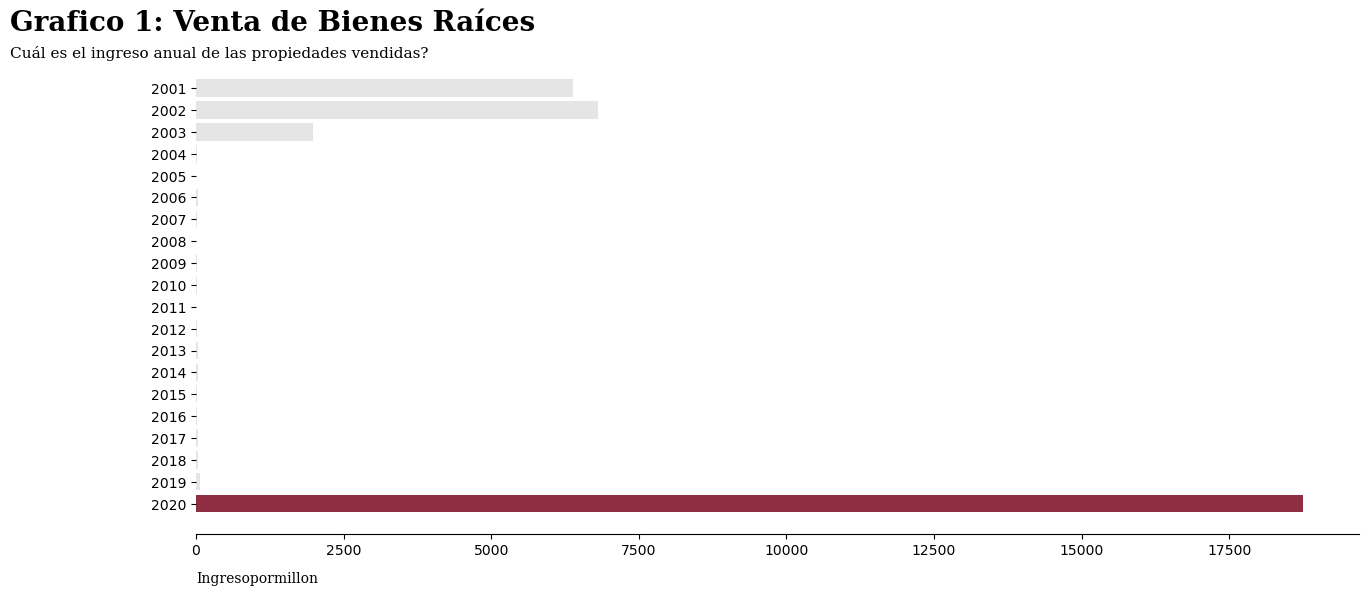

In [39]:
fig, ax = plt.subplots(1,1, figsize = (15,6.9), dpi=100) # para crear subgraficos, el 1,1 quieres decir q toma de vertice a vertice es decir todo el grafico, el figsize es el tamaño se recomienda los valores indicados en (), el dpi que son los pixelesde la figura sea = a 100
 
# Datos a graficar
ListYear = gf.index.tolist() #ListYear
y_pos = np.arange(len(ListYear)) #ListYear
 
ing = gf['IngresoporMillon(calc)'].tolist()  #IngresoporMillon(calc)
 
# Arreglo de colores
barColors = ['#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#c45d6e','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
             '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
             '#e5e5e5','#8f2d41'] 

ax.barh(y_pos, ing, align='center', color = barColors) 
ax.set_yticks(y_pos, labels=ListYear) 
ax.invert_yaxis()
 
    
    #configuracion#
    
title = "Grafico 1: Venta de Bienes Raíces" 
plt.suptitle(title, 
            horizontalalignment = 'left', # para darle un orientacion al titulo,  para este caso a la izquierda
            x = 0.001, # coordenas en x, por defaul 0.001 de los margenes
            y = 0.87, # coordenada en Y  por defaul 0.87 margen del maquina y el lienzo
            transform = fig.transFigure, #es para convertir a una figura en un lienzo pegado, pero me toma cada componente independiente 
            fontsize = 20, # tamano de la letra
            fontweight = "bold", # forma a la letra si va en negrita, oblicua etc, para nuestro caso va en negrita
            fontfamily = "serif") # seria el tipo de letra, se recomienda usar el serif por temas de compatibilidad
 
#formato del subtitulo
stitle = "Cuál es el ingreso anual de las propiedades vendidas?" 
ax.set_title(stitle, 
            horizontalalignment = 'left',
            x = 0.001,
            y = 0.80, 
            transform = fig.transFigure,
            fontsize = 11,
            fontweight = "regular", 
            fontfamily = "serif")
 
#formato del eje X
etiqueta = "Ingresopormillon" 
ax.set_xlabel(etiqueta,
             ha = 'left', 
             fontsize = 10,
             fontweight = "regular",
             fontfamily = "serif") 
 
#Configuracion de coordenadas de la etique del eje x
ax.xaxis.set_label_coords(x=0, y= -0.08, transform= ax.transAxes) 
 
#configuracion del tamano
ax.tick_params(axis='both', 
               labelsize = 10) 
 
#Configuracion de la ubicacion del grafico
plt.subplots_adjust(top=0.80)
 
 
plt.show()



<h1 style= "text-align: center; color:#566965"> Grafico #2</h1>
<ol>
 Cuál es margen promedio de ganancia por cada una de las propiedades vendidas?
</ol>

In [52]:
dfProyecto["IngresoporMillon(calc)"].sum()

34270.031795020004

In [53]:
dfProyecto["PromediodeGanancia(calc)"] = (dfProyecto["IngresoporMillon(calc)"]/dfProyecto["IngresoporMillon(calc)"].sum())*100


In [54]:
dfProyecto.head(6)

,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmounte,SalesRatio,PropertyType,ResidentialType,IngresoporMillon(calc),PromediodeGanancia(calc)
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,0.17450,0.000509
1,20002,2020,2020-02-10 00:00:00,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,0.17700,0.000516
2,200212,2020,2021-09-03 00:00:00,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,0.04950,0.000144
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,0.27071,0.000790
4,200377,2020,2021-02-07 00:00:00,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,0.58517,0.001708
5,200109,2020,2020-09-12 00:00:00,Avon,57 FAR HILLS DRIVE,847520,1250000.0,0.6780,Residential,Single Family,0.40248,0.001174


In [57]:
dfProyecto.shape

(200332, 12)

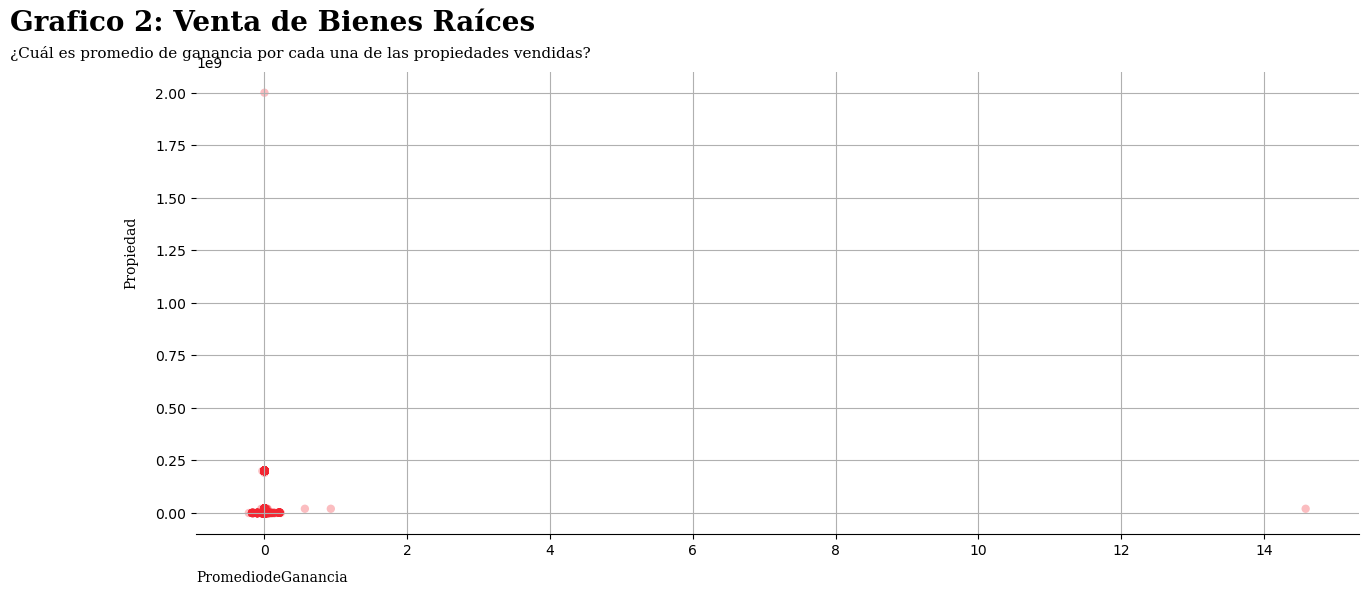

In [92]:
fig, ax = plt.subplots(1,1, figsize = (15,6.9), dpi=100) 
 
n = 200332
x = dfProyecto['PromediodeGanancia(calc)'] 
y = dfProyecto['SerialNumber'] 
 
ax.scatter(x, y, c='#f32531', alpha=0.3, edgecolors='none') 
ax.grid(True) 
 

title = "Grafico 2: Venta de Bienes Raíces"
plt.suptitle(title,
            horizontalalignment = 'left',
            x = 0.001,
            y = 0.87,
            transform = fig.transFigure,
            fontsize = 20,
            fontweight = "bold",
            fontfamily = "serif")
 
#formato del subtitulo
stitle = "¿Cuál es promedio de ganancia por cada una de las propiedades vendidas? "
ax.set_title(stitle,
            horizontalalignment = 'left',
            x = 0.001,
            y = 0.80,
            transform = fig.transFigure,
            fontsize = 11,
            fontweight = "regular",
            fontfamily = "serif")
 
#formato del eje X
etiqueta = "PromediodeGanancia"
ax.set_xlabel(etiqueta,
             ha = 'left',
             fontsize = 10,
             fontweight = "regular",
             fontfamily = "serif")
 
#formato del eje Y
etiqueta_y = "Propiedad"
ax.set_ylabel(etiqueta_y,
             ha = 'left',
             fontsize = 10,
             fontweight = "regular",
             fontfamily = "serif")
 
#Configuracion de coordenadas de la etique del eje x - y
ax.xaxis.set_label_coords(x=0, y= -0.08, transform= ax.transAxes) # para modificar las coordenadas el eje x
ax.yaxis.set_label_coords(x=-0.05, y= 0.53, transform= ax.transAxes) # para modificar las coordenadas el eje y, se recomiendo usar 0.03 y 0.45 y empezar ajustar
 
#configuracion del tamano
ax.tick_params(axis='both', 
               labelsize = 10)
 
#Congiruacion de la ubicacion del grafico
plt.subplots_adjust(top=0.78)
 
 
plt.show()
